In [136]:
import fastf1 as ff1
from fastf1 import utils
from fastf1.core import Laps
from fastf1 import plotting

from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection

import numpy as np

import pandas as pd

from timple.timedelta import strftimedelta

In [34]:
# Setup plotting
plotting.setup_mpl()

# Enable the cache
ff1.Cache.enable_cache('/Users/cameronstevens/Documents/Coding/F1_Analytics/cache') 

# Get rid of some pandas warnings that are not relevant for us at the moment
pd.options.mode.chained_assignment = None 

In [130]:

# we only want support for timedelta plotting in this example
ff1.plotting.setup_mpl(mpl_timedelta_support=True, color_scheme=None, misc_mpl_mods=False)


In [4]:
year, grand_prix, session = 2022, 'Miami', 'Q'

quali = ff1.get_session(year, grand_prix, session)
quali.load() # This is new with Fastf1 v.2.2

# This is how it used to be:
# laps = quali.load_laps(with_telemetry=True)

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
core        WARNING 	No lap data for driver 31
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '1', '11', '77', '44', '10', '4', '22', '18', '14', '63', '5', '3', '47', '20', '24', '23', '6', '31']


In [6]:
driver_1, driver_2 = 'VER', 'LEC'

# Laps can now be accessed through the .laps object coming from the session
laps_driver_1 = quali.laps.pick_driver(driver_1)
laps_driver_2 = quali.laps.pick_driver(driver_2)

# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

In [7]:
# Make sure whe know the team name for coloring
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

In [8]:
# extract delta time
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

In [22]:

plot_size = [15, 15]
plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} VS {driver_2}"
plot_ratios = [1, 3, 2, 1, 1, 2]
#plot_ratios = [1, 3, 2, 1, 1, 2,1]
plot_filename = plot_title.replace(" ", "") + ".png"

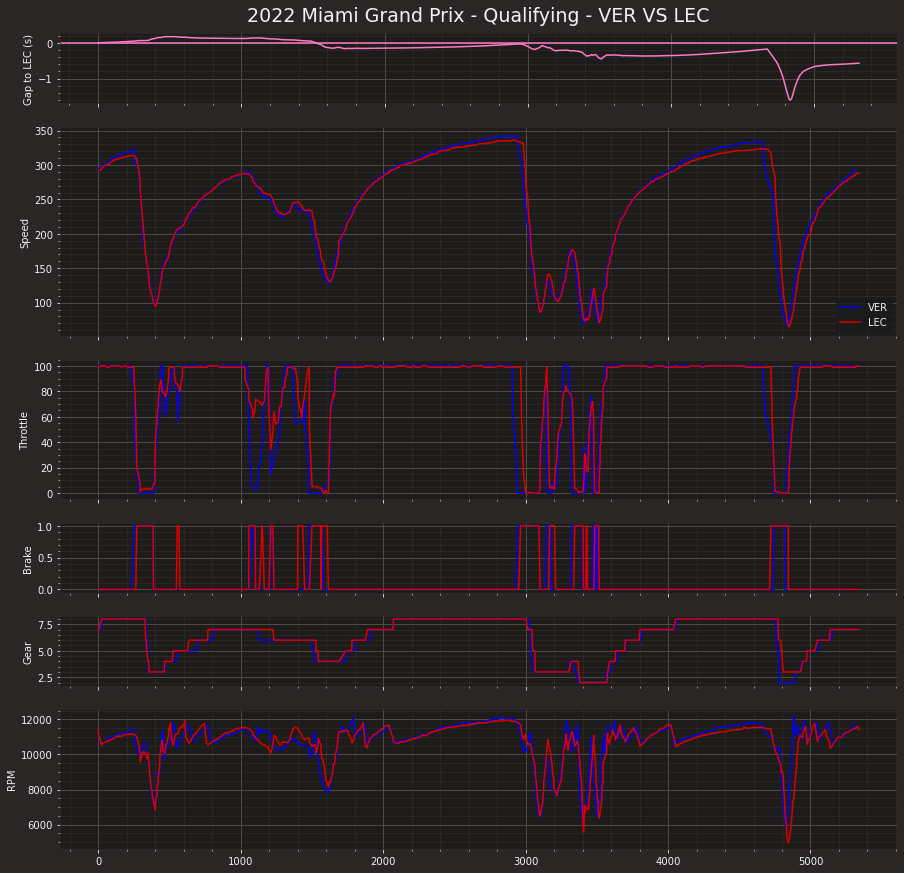

In [23]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size


# Create subplots with different sizes
fig, ax = plt.subplots(6, gridspec_kw={'height_ratios': plot_ratios})
# Create subplots with different sizes which includes DRS data
#fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})


# Set the plot title
ax[0].title.set_text(plot_title)


# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

# Speed trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

# DRS trace
#ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
#ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
#ax[6].set(ylabel='DRS')
#ax[6].set(xlabel='Lap distance (meters)')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
plt.savefig(plot_filename, dpi=300)
plt.show()


In [38]:
year, grand_prix, session = 2022, 'Miami', 'R'

racemiami = ff1.get_session(year, grand_prix, session)
racemiami.load() # This is new with Fastf1 v.2.2

driver_1, driver_2 = 'VER', 'LEC'


# Laps can now be accessed through the .laps object coming from the session
laps_driver_1 = racemiami.laps.pick_driver(driver_1)
laps_driver_2 = racemiami.laps.pick_driver(driver_2)

# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

# Make sure whe know the team name for coloring
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

core           INFO 	Loading data for Miami Grand Prix - Race [v2.2.4]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No c

In [132]:
drivers = pd.unique(session_miami.laps['Driver'])
print(drivers)

['LEC' 'ALB' 'ZHO' 'MAG' 'MSC' 'RIC' 'VET' 'RUS' 'ALO' 'STR' 'TSU' 'NOR'
 'GAS' 'HAM' 'BOT' 'PER' 'VER' 'SAI' 'LAT' 'OCO']


In [137]:
#Creagte new lap object that can be sorted by laptime and reindex them by starting position
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = session_miami.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

In [139]:
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     VER 0 days 00:01:31.361000        0 days 00:00:00
1     LEC 0 days 00:01:31.488000 0 days 00:00:00.127000
2     SAI 0 days 00:01:31.790000 0 days 00:00:00.429000
3     PER 0 days 00:01:31.819000 0 days 00:00:00.458000
4     RUS 0 days 00:01:32.195000 0 days 00:00:00.834000
5     MSC 0 days 00:01:32.528000 0 days 00:00:01.167000
6     HAM 0 days 00:01:32.941000 0 days 00:00:01.580000
7     TSU 0 days 00:01:33.035000 0 days 00:00:01.674000
8     OCO 0 days 00:01:33.163000 0 days 00:00:01.802000
9     BOT 0 days 00:01:33.184000 0 days 00:00:01.823000
10    RIC 0 days 00:01:33.265000 0 days 00:00:01.904000
11    STR 0 days 00:01:33.312000 0 days 00:00:01.951000
12    ALO 0 days 00:01:33.331000 0 days 00:00:01.970000
13    NOR 0 days 00:01:33.411000 0 days 00:00:02.050000
14    ALB 0 days 00:01:33.447000 0 days 00:00:02.086000
15    VET 0 days 00:01:33.479000 0 days 00:00:02.118000
16    MAG 0 days 00:01:33.511000 0 days 00:00:02

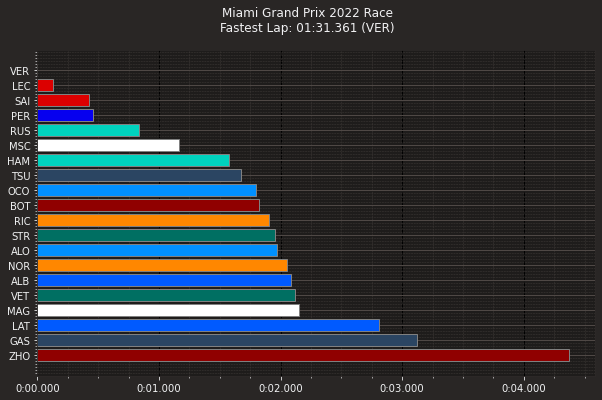

In [144]:
#Create a list of team colours for per lap 
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)


#Plot all the data 

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

# show fastest at the top
ax.invert_yaxis()

# draw vertical lines behind the bars
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)


# Add titles to the plot including a legend

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session_miami.event['EventName']} {session_miami.event.year} Race\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

In [180]:
car_pos = racemiami.laps

AttributeError: 'Laps' object has no attribute 'pos_data'

In [201]:
telemetry_driver_1

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance
2,2022-05-08 21:01:33.852,0 days 02:30:33.844000,,NaN,0 days 00:00:00,11084,279,7,100,False,0,interpolation,0.000005,OnTrack,1839,127,249,0.000000
3,2022-05-08 21:01:33.883,0 days 02:30:33.875000,,NaN,0 days 00:00:00.031000,11112,280,7,100,False,0,pos,0.000457,OnTrack,1860,115,250,2.411111
4,2022-05-08 21:01:34.022,0 days 02:30:34.014000,,NaN,0 days 00:00:00.170000,11168,281,7,100,False,0,car,0.002493,OnTrack,1951,56,249,13.260833
5,2022-05-08 21:01:34.183,0 days 02:30:34.175000,,NaN,0 days 00:00:00.331000,11212,282,7,100,False,0,pos,0.004867,OnTrack,2059,-11,250,25.872500
6,2022-05-08 21:01:34.363,0 days 02:30:34.355000,,NaN,0 days 00:00:00.511000,11257,283,7,100,False,0,pos,0.007539,OnTrack,2180,-87,251,40.022500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,2022-05-08 21:03:04.823,0 days 02:32:04.815000,,NaN,0 days 00:01:30.971000,11040,277,7,100,False,0,pos,0.990072,OnTrack,1610,267,249,5290.366111
669,2022-05-08 21:03:04.862,0 days 02:32:04.854000,,NaN,0 days 00:01:31.010000,11063,278,7,100,False,0,car,0.990636,OnTrack,1636,251,249,5293.377778
670,2022-05-08 21:03:05.142,0 days 02:32:05.134000,,NaN,0 days 00:01:31.290000,11062,279,7,100,False,0,car,0.994693,OnTrack,1822,137,249,5315.077778
671,2022-05-08 21:03:05.183,0 days 02:32:05.175000,,NaN,0 days 00:01:31.331000,11132,280,7,100,False,0,pos,0.995291,OnTrack,1850,121,250,5318.266667


core           INFO 	Loading data for Miami Grand Prix - Race [v2.2.4]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '23', '24', '20', '47', '3', '5', '63', '14', '18', '22', '4', '10', '44', '77', '11', '1', '55', '6', '31']


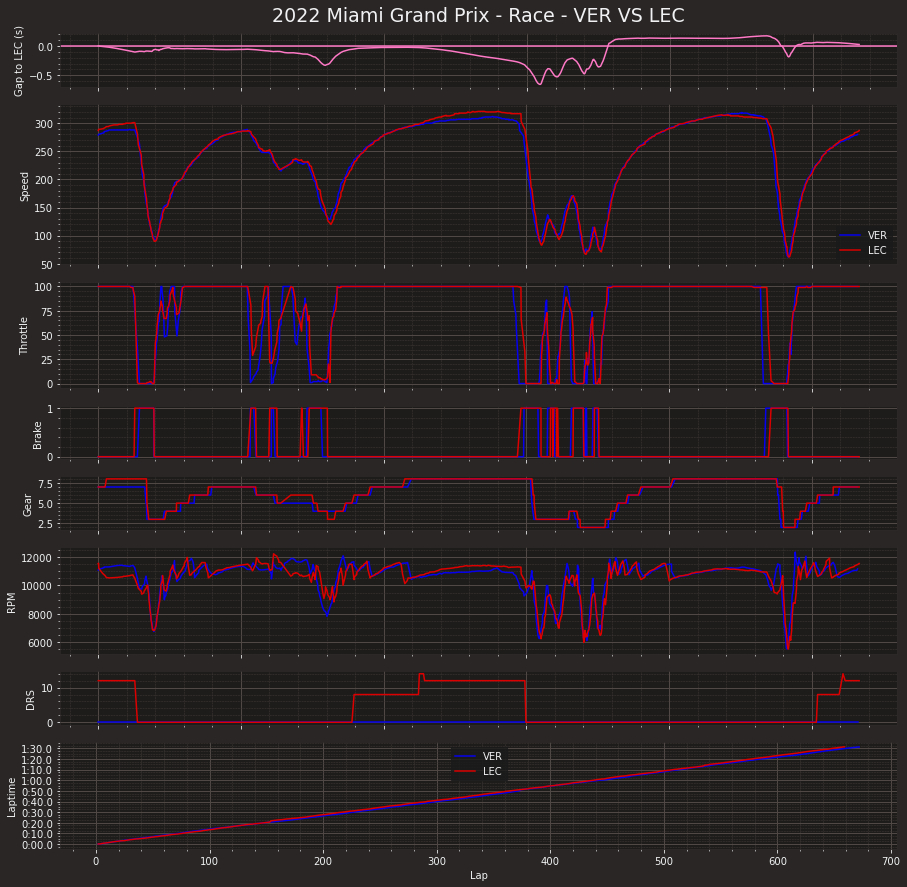

In [203]:
year, grand_prix, session = 2022, 'Miami', 'R'

racemiami = ff1.get_session(year, grand_prix, session)
racemiami.load() # This is new with Fastf1 v.2.2

driver_1, driver_2 = 'VER', 'LEC'


# Laps can now be accessed through the .laps object coming from the session
laps_driver_1 = racemiami.laps.pick_driver(driver_1)
laps_driver_2 = racemiami.laps.pick_driver(driver_2)

# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

# Make sure whe know the team name for coloring
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

# extract delta time
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)



plot_size = [15, 15]
plot_title = f"{racemiami.event.year} {racemiami.event.EventName} - {racemiami.name} - {driver_1} VS {driver_2}"
#plot_ratios = [1, 3, 2, 1, 1, 2]
plot_ratios = [1, 3, 2, 1, 1, 2,1, 2]
plot_filename = plot_title.replace(" ", "") + ".png"




# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size


# Create subplots with different sizes
#fig, ax = plt.subplots(6, gridspec_kw={'height_ratios': plot_ratios})
# Create subplots with different sizes which includes DRS data
fig, ax = plt.subplots(8, gridspec_kw={'height_ratios': plot_ratios})


# Set the plot title
ax[0].title.set_text(plot_title)


# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

# Speed trace
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')


ax[7].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Time'],  label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[7].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Time'], label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[7].set(ylabel='Laptime', xlabel='Lap')
ax[7].legend(loc="upper center")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
plt.savefig(plot_filename, dpi=300)
plt.show()



In [181]:
laps.head()
laps_driver_1.T

,828,829,830,831,832,833,834,835,836,837,...,875,876,877,878,879,880,881,882,883,884
Time,0 days 01:03:53.401000,0 days 01:05:27.943000,0 days 01:07:02.493000,0 days 01:08:36.780000,0 days 01:10:11.100000,0 days 01:11:45.327000,0 days 01:13:19.594000,0 days 01:14:53.912000,0 days 01:16:29.327000,0 days 01:18:03.434000,...,0 days 02:22:54.131000,0 days 02:24:26.423000,0 days 02:25:58.301000,0 days 02:27:30.351000,0 days 02:29:02.388000,0 days 02:30:33.844000,0 days 02:32:05.205000,0 days 02:33:36.955000,0 days 02:35:08.695000,0 days 02:36:40.153000
DriverNumber,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
LapTime,NaT,0 days 00:01:34.542000,0 days 00:01:34.550000,0 days 00:01:34.287000,0 days 00:01:34.320000,0 days 00:01:34.227000,0 days 00:01:34.267000,0 days 00:01:34.318000,0 days 00:01:35.415000,0 days 00:01:34.107000,...,0 days 00:01:32.397000,0 days 00:01:32.292000,0 days 00:01:31.878000,0 days 00:01:32.050000,0 days 00:01:32.037000,0 days 00:01:31.456000,0 days 00:01:31.361000,0 days 00:01:31.750000,0 days 00:01:31.740000,0 days 00:01:31.458000
LapNumber,1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,55,56,57
Stint,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
PitOutTime,0 days 00:23:51.168000,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
PitInTime,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
Sector1Time,NaT,0 days 00:00:32.267000,0 days 00:00:32.182000,0 days 00:00:32.092000,0 days 00:00:32.028000,0 days 00:00:31.891000,0 days 00:00:31.876000,0 days 00:00:32.111000,0 days 00:00:32.514000,0 days 00:00:31.667000,...,0 days 00:00:30.870000,0 days 00:00:30.552000,0 days 00:00:30.507000,0 days 00:00:30.714000,0 days 00:00:30.509000,0 days 00:00:30.364000,0 days 00:00:30.370000,0 days 00:00:30.572000,0 days 00:00:30.504000,0 days 00:00:30.446000
Sector2Time,0 days 00:00:35.848000,0 days 00:00:35.970000,0 days 00:00:36.062000,0 days 00:00:35.968000,0 days 00:00:35.942000,0 days 00:00:35.971000,0 days 00:00:36.069000,0 days 00:00:36.063000,0 days 00:00:36.330000,0 days 00:00:36.026000,...,0 days 00:00:35.412000,0 days 00:00:35.660000,0 days 00:00:35.470000,0 days 00:00:35.477000,0 days 00:00:35.689000,0 days 00:00:35.242000,0 days 00:00:35.138000,0 days 00:00:35.299000,0 days 00:00:35.334000,0 days 00:00:35.156000
Sector3Time,0 days 00:00:26.431000,0 days 00:00:26.305000,0 days 00:00:26.306000,0 days 00:00:26.227000,0 days 00:00:26.350000,0 days 00:00:26.365000,0 days 00:00:26.322000,0 days 00:00:26.144000,0 days 00:00:26.571000,0 days 00:00:26.414000,...,0 days 00:00:26.115000,0 days 00:00:26.080000,0 days 00:00:25.901000,0 days 00:00:25.859000,0 days 00:00:25.839000,0 days 00:00:25.850000,0 days 00:00:25.853000,0 days 00:00:25.879000,0 days 00:00:25.902000,0 days 00:00:25.856000


In [79]:
laps_driver_1.loc[laps_driver_1['LapTime'] == min(laps_driver_1['LapTime'].dropna())].T

,881
Time,0 days 02:32:05.205000
DriverNumber,1
LapTime,0 days 00:01:31.361000
LapNumber,54
Stint,2
PitOutTime,NaT
PitInTime,NaT
Sector1Time,0 days 00:00:30.370000
Sector2Time,0 days 00:00:35.138000
Sector3Time,0 days 00:00:25.853000


In [81]:
#laps_driver_1.describe



laps_driver_2.loc[laps_driver_2['LapTime'] == min(laps_driver_2['LapTime'].dropna())].T

,52
Time,0 days 02:30:34.794000
DriverNumber,16
LapTime,0 days 00:01:31.488000
LapNumber,53
Stint,2
PitOutTime,NaT
PitInTime,NaT
Sector1Time,0 days 00:00:30.462000
Sector2Time,0 days 00:00:35.329000
Sector3Time,0 days 00:00:25.697000


In [84]:
laps[['Team', 'Driver', 'LapTime']].groupby(['Team', 'Driver']).min().sort_values(['Team', 'LapTime'])


LapTime
Team            Driver                       
Alfa Romeo      BOT    0 days 00:01:29.475000
                ZHO    0 days 00:01:31.020000
AlphaTauri      GAS    0 days 00:01:29.690000
                TSU    0 days 00:01:29.932000
Alpine          ALO    0 days 00:01:30.160000
Aston Martin    STR    0 days 00:01:29.996000
                VET    0 days 00:01:30.214000
Ferrari         LEC    0 days 00:01:28.796000
                SAI    0 days 00:01:28.986000
Haas F1 Team    MSC    0 days 00:01:30.423000
                MAG    0 days 00:01:30.975000
McLaren         NOR    0 days 00:01:29.634000
                RIC    0 days 00:01:30.310000
Mercedes        HAM    0 days 00:01:29.625000
                RUS    0 days 00:01:30.173000
Red Bull Racing VER    0 days 00:01:28.991000
                PER    0 days 00:01:29.036000
Williams        ALB    0 days 00:01:31.266000
                LAT    0 days 00:01:31.325000

In [89]:
laps[['Team','Driver', 'SpeedST']].groupby(['Team','Driver']).max().sort_values('SpeedST', ascending=False)


SpeedST
Team            Driver         
Red Bull Racing VER       334.0
                PER       334.0
Williams        ALB       330.0
AlphaTauri      GAS       327.0
                TSU       327.0
Alpine          ALO       327.0
Mercedes        HAM       327.0
Alfa Romeo      BOT       326.0
Haas F1 Team    MSC       326.0
                MAG       326.0
Alfa Romeo      ZHO       326.0
Aston Martin    STR       326.0
Mercedes        RUS       325.0
Ferrari         LEC       325.0
Aston Martin    VET       325.0
Williams        LAT       324.0
McLaren         NOR       323.0
Ferrari         SAI       323.0
McLaren         RIC       322.0

In [91]:
year = 2022
ses = 'R'
driver = 'VER'
colormap = plt.cm.plasma


In [95]:
year, grand_prix, session = 2022, 'Miami', 'R'

session_miami = ff1.get_session(year, grand_prix, session)
session_miami.load() # This is new with Fastf1 v.2.2



lap = session_miami.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

core           INFO 	Loading data for Miami Grand Prix - Race [v2.2.4]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '23', '24', '20', '47', '3', '5', '63', '14', '18', '22', '4', '10', '44', '77', '11', '1', '55', '6', '31']


In [96]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

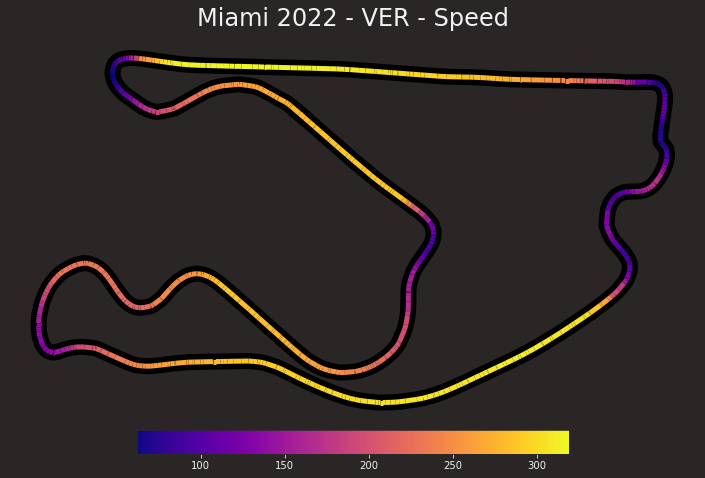

In [109]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{grand_prix} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()

In [117]:
year, grand_prix, session = 2022, 'Miami', 'R'

session_miami = ff1.get_session(year, grand_prix, session)
session_miami.load() # This is new with Fastf1 v.2.2

#lap = session_miami.laps.pick_driver(driver).pick_fastest()

# Get telemetry data

lap = session_miami.laps.pick_fastest()
tel = lap.get_telemetry()






core           INFO 	Loading data for Miami Grand Prix - Race [v2.2.4]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '23', '24', '20', '47', '3', '5', '63', '14', '18', '22', '4', '10', '44', '77', '11', '1', '55', '6', '31']


In [118]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

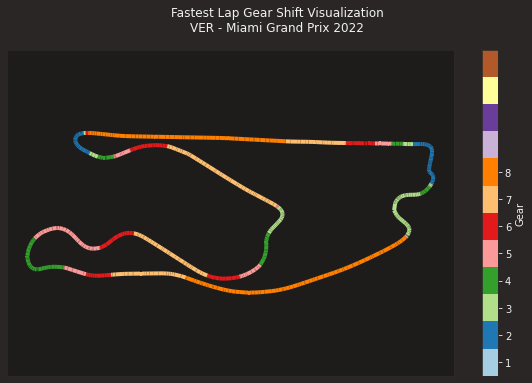

In [126]:
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)


#Create a plot

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session_miami.event['EventName']} {session_miami.event.year}"
)

cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()


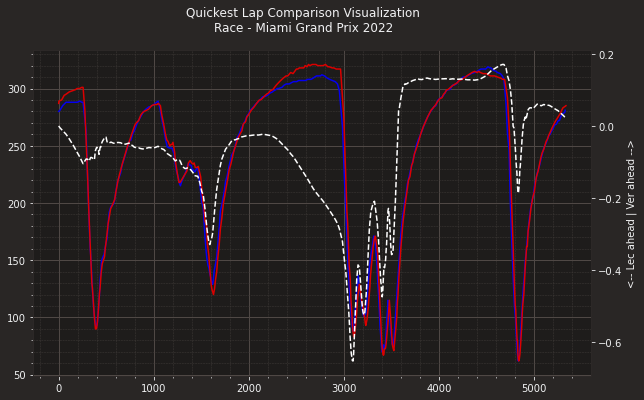

In [178]:
plotting.setup_mpl()




lec = session_miami.laps.pick_driver('LEC').pick_fastest()
ver = session_miami.laps.pick_driver('VER').pick_fastest()

delta_time, ref_tel, compare_tel = utils.delta_time(ver, lec)
# ham is reference, lec is compared

fig, ax = plt.subplots()
# use telemetry returned by .delta_time for best accuracy,
# this ensure the same applied interpolation and resampling
ax.plot(ref_tel['Distance'], ref_tel['Speed'],
        color=plotting.team_color(ver['Team']))
ax.plot(compare_tel['Distance'], compare_tel['Speed'],
        color=plotting.team_color(lec['Team']))

title = plt.suptitle(
    f"Quickest Lap Comparison Visualization\n"
    f"{session_miami.name} - {session_miami.event['EventName']} {session_miami.event.year}"
)

twin = ax.twinx()
twin.plot(ref_tel['Distance'], delta_time, '--', color='white')
twin.set_ylabel("<-- Lec ahead | Ver ahead -->")
plt.show()

In [69]:
weather_laps_miami = racemiami.weather_data
weather_laps_miami

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:30.789000,31.7,49.0,1010.0,True,42.8,322,3.5
1,0 days 00:01:30.783000,31.4,49.0,1010.0,True,42.8,322,3.5
2,0 days 00:02:30.788000,31.3,49.0,1010.0,True,42.8,322,3.5
3,0 days 00:03:30.789000,31.2,49.0,1010.0,True,42.8,322,3.5
4,0 days 00:04:30.788000,30.8,53.0,1010.0,True,36.2,312,2.7
...,...,...,...,...,...,...,...,...
157,0 days 02:37:31.353000,29.7,67.0,1008.9,False,40.0,69,1.7
158,0 days 02:38:31.368000,29.7,67.0,1008.9,False,40.6,119,2.5
159,0 days 02:39:31.380000,29.8,67.0,1008.7,False,41.3,146,2.4
160,0 days 02:40:31.396000,29.9,66.0,1008.7,False,41.0,142,1.7


In [184]:
# Load the session data
qualifying_miami = ff1.get_session(2022, 'Miami', 'Q')

qualifying_miami.load() # This is new with Fastf1 v.2.2


#qualifying_miami.laps(with_telemetry=True)



core           INFO 	Loading data for Miami Grand Prix - Qualifying [v2.2.4]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
core        WARNING 	No lap data for driver 31
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '1', '11', '77', '44', '10', '4', '22', '18', '14', '63', '5', '3', '47', '20', '24', '23', '6', '31']


In [188]:


# Get laps of the drivers (LEC & VER)
laps_lec = qualifying_miami.laps.pick_driver('LEC')#.pick_fastest()
laps_ver = qualifying_miami.laps.pick_driver('VER')#.pick_fastest()

# We are only analyzing stint 1, so select that one
#laps_lec = laps_lec.loc[laps_lec['Stint'] == 3]
#laps_ver = laps_ver.loc[laps_ver['Stint'] == 3]


In [189]:
laps_lec['RaceLapNumber'] = laps_lec['LapNumber'] - 1
laps_ver['RaceLapNumber'] = laps_ver['LapNumber'] - 1


In [190]:
full_distance_ver_lec = pd.DataFrame()
summarized_distance_ver_lec = pd.DataFrame()


In [191]:
for lap in laps_ver.iterlaps():
    telemetry = lap[1].get_car_data().add_distance().add_driver_ahead()
    
    # Only run this loop when driver ahead is RIC, otherwise we compare wrong distance gaps
    telemetry = telemetry.loc[telemetry['DriverAhead'] == "3"]
    
    if len(telemetry) != 0:
        # Full distance
        lap_telemetry = telemetry[['Distance', 'DistanceToDriverAhead']]
        lap_telemetry.loc[:, 'Lap'] = lap[0] + 1

        full_distance_ver_lec = full_distance_ver_lec.append(lap_telemetry)

        # Average / median distance
        distance_mean = np.nanmean(telemetry['DistanceToDriverAhead'])
        distance_median = np.nanmedian(telemetry['DistanceToDriverAhead'])

        summarized_distance_ver_lec = summarized_distance_ver_lec.append({
            'Lap': lap[0] + 1,
            'Mean': distance_mean,
            'Median': distance_median
        }, ignore_index = True)


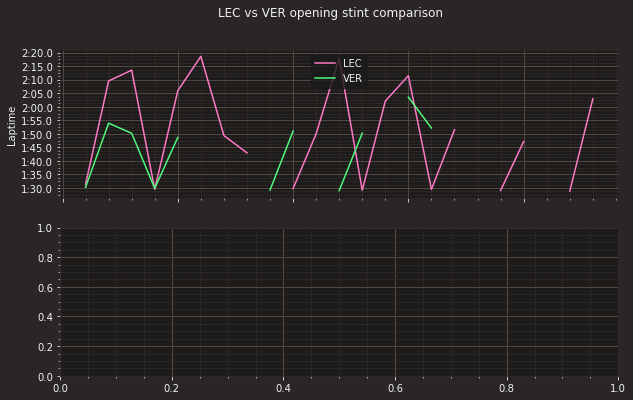

In [194]:
plt.rcParams['figure.figsize'] = [10, 6]

fig, ax = plt.subplots(2)
fig.suptitle("LEC vs VER opening stint comparison")

ax[0].plot(laps_lec['RaceLapNumber'], laps_lec['LapTime'], label='LEC')
ax[0].plot(laps_ver['RaceLapNumber'], laps_ver['LapTime'], label='VER')
ax[0].set(ylabel='Laptime', xlabel='Lap')
ax[0].legend(loc="upper center")

#ax[1].plot(summarized_distance_ver_lec['Lap'], summarized_distance_ver_lec['Mean'], label='Mean', color='red')
#ax[1].plot(summarized_distance_ver_lec['Laps'], summarized_distance_ver_lec['Median'], label='Median', color='grey')
#ax[1].set(ylabel='Distance (meters)', xlabel='Laps')
#ax[1].legend(loc="upper center")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()